<a href="https://colab.research.google.com/github/Mahipathi28/flam-research-and-development-assignment-/blob/main/Flam_R%26D_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [ ]:


# Load data
data = pd.read_csv("/content/xy_data.csv")
x_true, y_true = data["x"].values, data["y"].values
t = np.linspace(6, 60, len(x_true))


In [ ]:

# Model
def model(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    e = np.exp(M * np.abs(t))
    s = np.sin(0.3 * t)
    x = t * np.cos(theta) - e * s * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + e * s * np.cos(theta)
    return x, y




In [ ]:
# Objective (mean absolute error)
def objective(params):
    theta, M, X = params
    x_pred, y_pred = model(t, theta, M, X)
    return np.mean(np.abs(x_true - x_pred) + np.abs(y_true - y_pred))

In [ ]:
# Initial guess (simple, hand-picked)
initial_guess = [20, 0.0, 0.0]  # theta, M, X
bounds = [(0, 45), (-0.05, 0.05), (-100, 100)]

# Fit
res = minimize(objective, x0=initial_guess, bounds=bounds)
theta, M, X = res.x

In [ ]:
# Diagnostics
x_pred, y_pred = model(t, theta, M, X)
res_x = x_true - x_pred
res_y = y_true - y_pred
per_point = np.abs(res_x) + np.abs(res_y)

print(f"Best parameters: θ={theta:.3f}°, M={M:.5f}, X={X:.3f}")
print(f"Mean L1 per point: {np.mean(per_point):.3f}")
print(f"Mean abs error (x): {np.mean(np.abs(res_x)):.3f}")
print(f"Mean abs error (y): {np.mean(np.abs(res_y)):.3f}")
print(f"RMSE: {np.sqrt(np.mean(res_x**2 + res_y**2)):.3f}")


Best parameters: θ=28.117°, M=0.02138, X=54.899
Mean L1 per point: 25.243
Mean abs error (x): 16.422
Mean abs error (y): 8.821
RMSE: 22.756


In [ ]:
# Compute and print total L1 as required in assignment
L1 = np.sum(np.abs(x_true - x_pred) + np.abs(y_true - y_pred))
print(f"L1 (sum of |dx| + |dy|): {L1:.4f}")


L1 (sum of |dx| + |dy|): 37865.0951


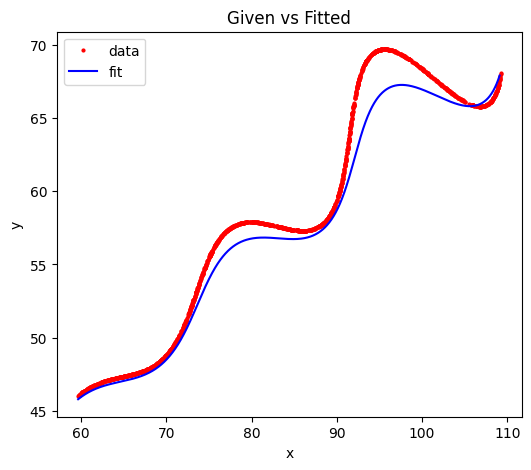

In [ ]:
# Fitted vs given
plt.figure(figsize=(6,5))
plt.plot(x_true, y_true, 'r.', label='data', markersize=4)
plt.plot(x_pred, y_pred, 'b-', label='fit')
plt.legend(); plt.xlabel('x'); plt.ylabel('y'); plt.title('Given vs Fitted')
plt.show()

$$
\begin{aligned}
\text{Best Parameters:} \quad & \theta = 28.117^\circ, \; M = 0.02138, \; X = 54.899 \\
\text{Mean L1 per point:} \quad & 25.243 \\
\text{Mean Absolute Error (x):} \quad & 16.422 \\
\text{Mean Absolute Error (y):} \quad & 8.821 \\
\text{RMSE:} \quad & 22.756 \\
\text{Total } L_1: \quad & 37865.0951
\end{aligned}
$$
